In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 1.5,
    "ytick.major.size": 1.5,
    "lines.linewidth": 0.8,
})

cm = 1/2.54  # centimeters in inches

### MeerKAT and GMRT wide frequency coverage dynamic spectra

In [14]:
### load data - data already de-dispersed at the nonimal DM
mktdat = np.load("../data/radio_widefreq/meerkat_uhf_s0.npz")
gmrtdat = np.load("../data/radio_widefreq/gmrt_b345.npz")

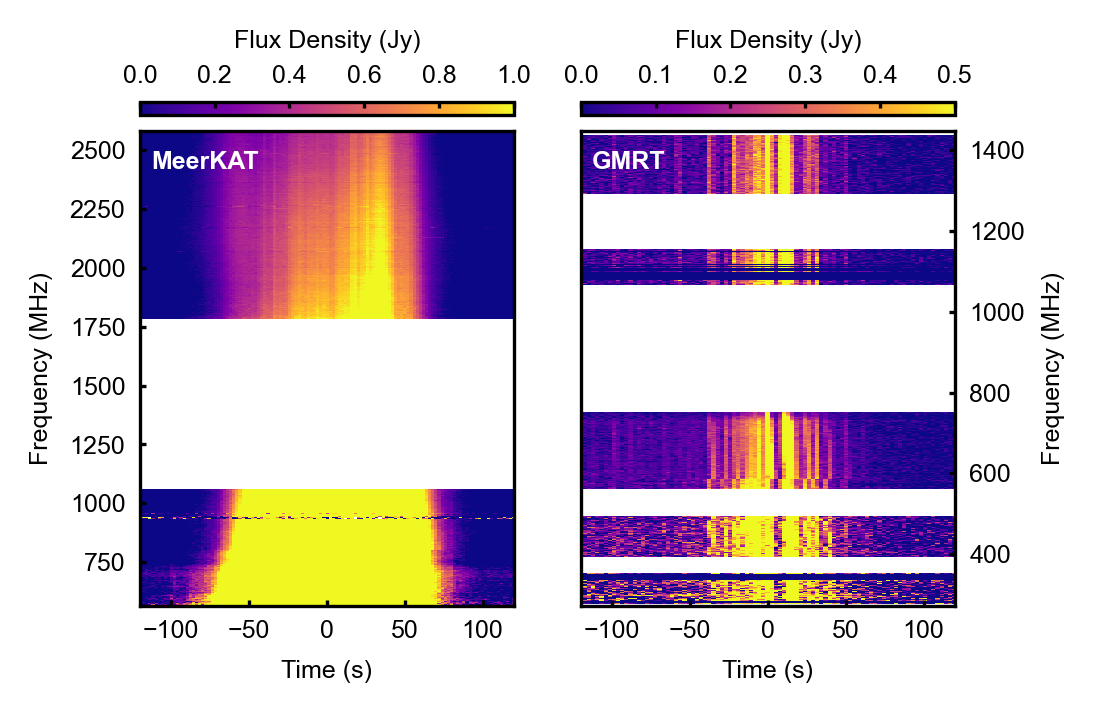

In [15]:
fig = plt.figure(figsize=(8.9*cm, 6*cm))
gs = GridSpec(figure=fig, nrows=1, ncols=2, hspace=0, wspace=0.18)

mktlc = np.nanmean(mktdat["data"], axis=-1)
mktt = mktdat["ntimes"] - np.median(mktdat["ntimes"][mktlc > 0.5])
mktf = mktdat["freqs"]

ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(
    mktdat["data"].T, vmax=1.0, vmin=-0.0,
    origin="lower", cmap = "plasma", aspect="auto",
    interpolation="none",
    extent=[mktt[0], mktt[-1], mktf[0]/1e6, mktf[-1]/1e6]
)
ax.set_xlim(-120, 120)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (MHz)")
ax.set_xticks([-100, -50, 0, 50, 100])

ax.text(0.03, 0.92, "MeerKAT", color="white", weight="bold", transform=ax.transAxes)

cb = fig.colorbar(
    im, pad=0.03, orientation='horizontal', fraction=0.1, location="top", aspect=30
)
cb.set_label("Flux Density (Jy)")
cb.solids.set(alpha=1)
cb.ax.xaxis.set_ticks([0., 0.2, 0.4, 0.6, 0.8, 1.0])
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


########## GMRT data
gmrtlc = np.nanmean(gmrtdat["data"], axis=-1)
gmrtt = gmrtdat["ntimes"] - np.median(gmrtdat["ntimes"][gmrtlc > 0.2])
gmrtf = gmrtdat["freqs"]

ax = fig.add_subplot(gs[0, 1])
im = ax.imshow(
    gmrtdat["data"].T, vmax=0.5, vmin=-0.0,
    origin="lower", cmap = "plasma", aspect="auto",
    interpolation="none",
    extent=[gmrtt[0], gmrtt[-1], gmrtf[0], gmrtf[-1]]
)
ax.set_xlim(-120, 120)

ax.yaxis.set_ticks_position("right")
ax.yaxis.set_label_position("right")
ax.set_xticks([-100, -50, 0, 50, 100])

ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (MHz)")

ax.text(0.03, 0.92, "GMRT", color="white", weight="bold", transform=ax.transAxes)

cb = fig.colorbar(
    im, pad=0.03, orientation='horizontal', fraction=0.1, location="top", aspect=30
)
cb.set_label("Flux Density (Jy)")
cb.solids.set(alpha=1)
cb.ax.xaxis.set_ticks([0., 0.1, 0.2, 0.3, 0.4, 0.5])
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

fig.savefig("meerkat_gmrt_widefreq.pdf", bbox_inches="tight", dpi=300)

### Extremely Faint Pulse detected in GMRT observation

In [16]:
import numpy as np
from collections import namedtuple

from astropy.time import Time
import matplotlib.pyplot as plt

dynspec = namedtuple('dynspec',['bandid','taisec','taihr','freqmhz','fluxds'])

ds3 = np.load("../data/gmrt_faint_pulse/gmrt.240630.b3.pkl", allow_pickle=True)
ds4 = np.load("../data/gmrt_faint_pulse/gmrt.240630.b4.pkl", allow_pickle=True)
ds5 = np.load("../data/gmrt_faint_pulse/gmrt.240630.b5.pkl", allow_pickle=True)

In [17]:
tstart = 160.198428 # start hour of the observation
tt3 = ds3.taihr - tstart
tt4 = ds4.taihr - tstart
tt5 = ds5.taihr - tstart

### make light curves from dynamic spectra; and normalise the data
lc3 = np.nanmean(ds3.fluxds, axis=1)
lc3 = lc3 / np.nanmax(lc3)
lc4 = np.nanmean(ds4.fluxds, axis=1)
lc4 = lc4 / np.nanmax(lc4)
lc5 = np.nanmean(ds5.fluxds, axis=1)
lc5 = lc5 / np.nanmax(lc5)

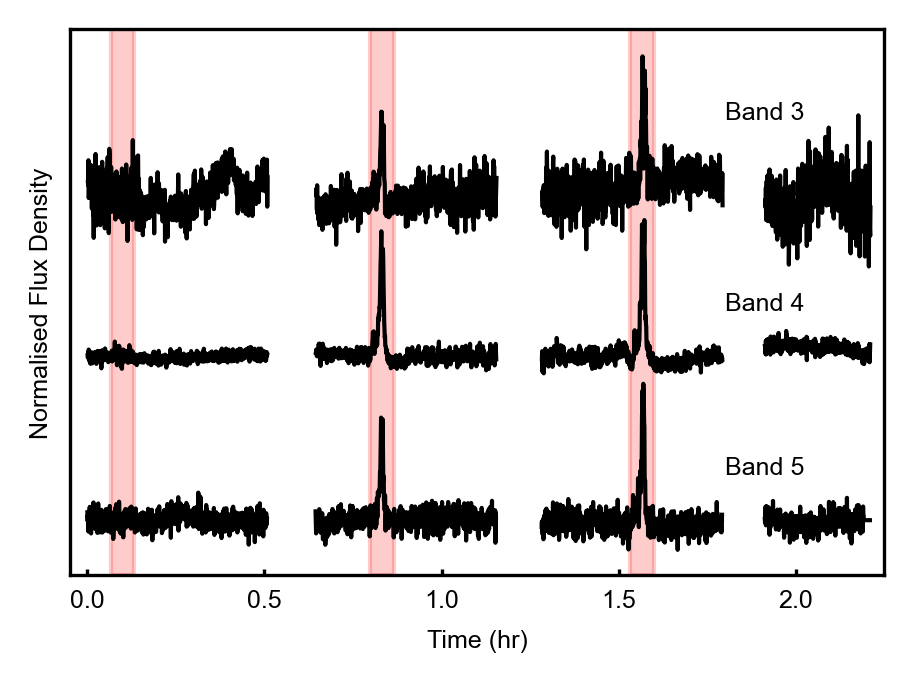

In [18]:
pulsestime = [1.565851, 0.832518, 0.099184]
pulsewidth = 4/60 # hour

fig = plt.figure(figsize=(8.9*cm, 6*cm))
ax = fig.add_subplot(1, 1, 1)

ax.plot(tt3, lc3+2.4, color="k", lw=1)
ax.plot(tt4, lc4+1.2, color="k", lw=1)
ax.plot(tt5, lc5, color="k", lw=1)

for ptime in pulsestime:
    ax.axvspan(
        xmin=ptime-pulsewidth/2, xmax=ptime+pulsewidth/2,
        color="red", alpha=0.2
    )

### add text
ax.text(1.8, 0.3, "Band 5", color="k", va="bottom", ha="left")
ax.text(1.8, 1.5, "Band 4", color="k", va="bottom", ha="left")
ax.text(1.8, 2.9, "Band 3", color="k", va="bottom", ha="left")

ax.set_yticks([])
ax.set_ylim(-0.4, 3.6)
ax.set_xlim(-0.05, 2.25)

ax.set_xlabel("Time (hr)")
ax.set_ylabel("Normalised Flux Density")

fig.savefig("gmrt_extremely_faint_pulse.pdf", bbox_inches="tight", dpi=300)